<h1 style="text-align: center; font-size: 450%; text-decoration: underline;">Home Assignment 4 - Fifth Question</h1>
<h2 style="text-align: center; font-size: 350%;">Ido Israeli (ID - 212432439)</h2>

<h2>KNN</h2>

<h3>imports</h3>

In [1747]:
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

<h3>Functions</h3>

<h4>Functions for Debugging</h4>

In [1748]:
#
def print_variable_data(variable, name=None):
    if not isinstance(name, str):
        name = "Unnamed Variable"
    print(f'-------------------{name}-------------------\n')
    print(f'Type: {type(variable)}')
    if isinstance(variable, np.ndarray): print(f'Shape: {variable.shape}')
    elif isinstance(variable, list): print(f'Shape: {variable.size}')
    print(f'contents:\n{variable}')
    print("\n--------------------------------------\n")


<h4>Functions for Selecting Train and Test Data</h4>

In [1749]:
#
def shuffle_dataframe(df):
    return df.sample(frac=1)

#
def select_train_and_test_by_train_percentage(df, train_percentage):
    if not isinstance(df, pd.DataFrame):
        print(f'ERROR!\nArgument must be an instance of pandas.DataFrame!')
        return -1
    train = df.sample(frac=train_percentage)
    test = df.drop(train.index)
    return train, test

<h4>Functions for Data Format Manipulation</h4>

In [1750]:
#
def get_dictionary_from_1darray(keys):
    dictio = {}
    dictio.update({key:0 for key in keys})
    return dictio

#
def get_ndarray_from_dataframe(df):
    # return df[df.columns[:]].values
    return np.array(df)

#
def get_features_and_classification(entry):
    """
    Separates the features of an entry from its classification, assuming the classification is found at the last index.

    :param entry: An entry of an instance that includes both the features and the classification.

    :return: A tuple of the features at index 0 and the classification at index 1.
    """
    features = entry[:-1]
    classification = entry[-1]
    return features, classification

#
def separate_features_and_classifications_for_dataframe(df):
    """
    Separates the features of all the entries in a dataframe from their respective classification.
    Assumes that the classification is found at the last index of every row.

    :param df: A pandas.DataFrame that holds entries with both features and classifications.

    :return: A tuple of the features at index 0 and the classifications at index 1.

    :error: returns -1 if argument df is not an instance of pandas.DataFrame
    """
    if not isinstance(df, pd.DataFrame):
        print(f'ERROR!\nArgument must be an instance of pandas.DataFrame!')
        return -1
    features = df[df.columns[:-1]].values
    classifications = df[df.columns[-1]].values
    return features, classifications

#
def separate_features_and_classifications_for_ndarray(arr):
    """
    Separates the features of all the entries in an ndarray from their respective classification.
    Assumes that the classification is found at the last index of every row.

    :param arr: A numpy.ndarray that holds entries with both features and classifications.

    :return: A tuple of the features at index 0 and the classifications at index 1.
    
    :error: returns -1 if argument arr is not an instance of numpy.ndarray
    """
    if not isinstance(arr, np.ndarray):
        print(f'ERROR!\nArgument must be an instance of numpy.ndarray!')
        return -1
    features = arr[:, :-1]
    classifications = arr[:, -1]
    return features, classifications

#
def separate_features_and_classifications_for_df_or_ndarray(table):
    """
    Separates the features of all the entries in a table from their respective classification.
    Assumes that the classification is found at the last index of every row.

    :param table: A numpy.ndarray or a pandas.DataFrame that holds entries with both features and classifications.

    :return: A tuple of the features at index 0 and the classifications at index 1.
    
    :error: returns -1 if argument table is not an instance of either numpy.ndarray or pandas.DataFrame
    """
    if isinstance(table, np.ndarray):
        return separate_features_and_classifications_for_ndarray(table)
    if isinstance(table, pd.DataFrame):
        return separate_features_and_classifications_for_dataframe(table)
    print(f'ERROR!\nArgument must be an instance of either numpy.ndarray or pandas.DataFrame !')
    return -1


<h4>Functions for Distance Calculation</h4>

In [1751]:
#
def euclidean_distance(p, q):
    """
    Calculates the euclidean distance between two points of the same number of dimensions.

    :param p: A point of n dimensions.
    :param q: A point of n dimensions.

    :return: The euclidean distance between point p and point q.
    """
    if not (isinstance(p, np.ndarray) and isinstance(q, np.ndarray)): return -1
    if p.ndim != 1 or q.ndim != 1: return -1
    if p.size != q.size: return -1

    dist = math.sqrt(np.square(np.subtract(q, p)).sum())
    return dist

#
def calc_euclidean_distances(p, points):
    """
    Calculates the euclidean distances between a point and multiple other points.

    :param p: A point of n dimensions.
    :param points: An array of points, each of n dimensions.

    :return: An array that contains the distance between the point p and each point in points.
    """
    return np.array([euclidean_distance(p, point) for point in points])


<h4>Functions for Classifying Data</h4>

In [1752]:
#
def get_indices_of_k_smallest(k, arr):
    """
    Finds the indices of the k smallest elements in an array.

    :param k: The number of smallest elements to find.
    :param arr: An array.

    :return: An unsorted array that contains the indices of the k smallest elements in arr.
    """
    if k < 0 or not isinstance(arr, np.ndarray): return -1
    if arr.ndim != 1: return -1
    if k > arr.size: return -1
    if k == arr.size: return np.arange(k)
    return np.argpartition(arr, k)[:k]

#
def most_common_amongst_indices(indices, arr):
    """
    Finds the most common element amongst specified indices of an array.

    :param indices: An array of indices to account for in the array.
    :param arr: An array.

    :return: The most common element found within the specified indices of the array arr.
    """
    in_indices = [arr[idx] for idx in indices if idx>=0 and idx<arr.size]
    return max(set(in_indices), key = in_indices.count)

#
def most_common_amongst_indices2(indices, arr):
    """
    Finds the most common element amongst specified indices of an array.
    Utilizes a little less efficient and less pretty, yet more simple way of achieving that.

    :param indices: An array of indices to account for in the array.
    :param arr: An array.

    :return: The most common element found within the specified indices of the array arr.
    """
    in_indices = []
    for idx in indices:
        if idx>=0 and idx<arr.size:
            in_indices.append(arr[idx])
    return max(set(in_indices), key = in_indices.count)


<h4>Functions for the KNN Bigger Picture</h4>

In [1753]:
#
def KNN_classification_for_single_entry(entry, table, k):
    """
    Classifies a single entry using KNN, based on pre-classified examples.

    :param entry: An instance to classify.
    :param table: A numpy.ndarray or a pandas.DataFrame of pre-classified examples.
    :param k: The number of the nearest neighbors to take into an account when classifing.

    :return: The KNN classification for the entry.

    :error: returns -1 if argument table is not an instance of either numpy.ndarray or pandas.DataFrame
    """
    examples_features, examples_classifications = separate_features_and_classifications_for_df_or_ndarray(table)
    classification = most_common_amongst_indices(get_indices_of_k_smallest(k, calc_euclidean_distances(entry, examples_features)), examples_classifications)
    return classification

#
def KNN_classification_for_multiple_entries(entries, examples, k):
    classifications = np.array([KNN_classification_for_single_entry(entry, examples, k) for entry in entries])
    return classifications

#
def classify_entries_using_KNN(entries, examples, k):
    classified_instances = np.c_[entries, KNN_classification_for_multiple_entries(entries, examples, k)]
    return classified_instances


<h4>Functions for Accuracy Calculations</h4>

In [1754]:
#
def KNN_decimal_accuracy(KNN_classified, original_classified):
    return (KNN_classified[:, -1] == original_classified[:, -1]).mean()

#
def KNN_percentage_accuracy(KNN_classified, original_classified):
    return 100*(KNN_classified[:, -1] == original_classified[:, -1]).mean()

#
def get_indices_of_max_accuracy(accuracies):
    max_accuracy = accuracies.max()
    return np.where(accuracies == max_accuracy)

<h4>Functions for Classification and Accuracy Combined</h4>

In [1755]:
#
def KNN_classify_and_check_accuracy(entries, examples, k, accuracy_reference=None):
    classified_instances = classify_entries_using_KNN(entries, examples, k)
    if accuracy_reference is None:
        accuracy_reference = examples
    accuracy = KNN_percentage_accuracy(classified_instances, accuracy_reference)
    return accuracy, classified_instances

# a rather slow function - a lot of computations and iterations needed
def KNN_accuracies_for_range_of_k(entries, examples, k_values, accuracy_reference=None):
    if accuracy_reference is None:
        accuracy_reference = examples
    accuracies = np.array([KNN_classify_and_check_accuracy(entries, examples, k, accuracy_reference)[0] for k in k_values])
    return accuracies

<h4>Functions for Average Across Multiple Randomizations of Train and Test</h4>

In [1756]:
# an incredibly slow function (probably inefficient) - takes about 4 minutes on my computer when number_of_randomizations = 100 !!!
def average_accuracies_for_multiple_randomized_train_and_test(df, train_part_deciaml, k_values, number_of_randomizations):
    train_avg_accuracies = np.zeros(k_values.size)
    test_avg_accuracies = np.zeros(k_values.size)
    train_times_k_was_max_accuracy = get_dictionary_from_1darray(k_values)
    test_times_k_was_max_accuracy = get_dictionary_from_1darray(k_values)
    
    for i in range(number_of_randomizations):
        train, test = map(np.array, select_train_and_test_by_train_percentage(df, train_part_deciaml))
        train_accuracies = KNN_accuracies_for_range_of_k(train[:, :-1], train, k_values)
        test_accuracies = KNN_accuracies_for_range_of_k(test[:, :-1], train, k_values, test)
        train_times_k_was_max_accuracy.update({k:train_times_k_was_max_accuracy[k]+1 for k in k_values[get_indices_of_max_accuracy(train_accuracies)]})
        test_times_k_was_max_accuracy.update({k:test_times_k_was_max_accuracy[k]+1 for k in k_values[get_indices_of_max_accuracy(test_accuracies)]})
        train_avg_accuracies = np.add(train_avg_accuracies, train_accuracies)
        test_avg_accuracies = np.add(test_avg_accuracies, test_accuracies)

    return (
        train_avg_accuracies/number_of_randomizations,
        test_avg_accuracies/number_of_randomizations,
        find_most_accurate_k(train_times_k_was_max_accuracy, number_of_randomizations),
        find_most_accurate_k(test_times_k_was_max_accuracy, number_of_randomizations)
        )

#
def find_most_accurate_k(times_k_was_max_accuracy, total_times_checked):
    max_val = max(times_k_was_max_accuracy.values())
    return np.array([k for k in times_k_was_max_accuracy if times_k_was_max_accuracy[k]==max_val]), 100*(max_val/total_times_checked)

<h4>Functions for Visualizing Results</h4>

In [1757]:
#
def print_accuracy_per_k(accuracies, k_values, accuracy_of_what=None):
    print("----------------------------------")
    if isinstance(accuracy_of_what, str): print(f'Accuracy of {accuracy_of_what} per K:\n')
    for accuracy, k in zip(accuracies, k_values):
        accuracy = int(accuracy) if accuracy.is_integer() else round(accuracy, 4)
        print(f'for K={k}, there is {accuracy}% accuracy.')
    print("----------------------------------")

#
def print_best_ks_on_average(best_ks, percentage):
    print(f'On average the best K values were:')
    for k in best_ks: print(f'K={k}')
    percentage = int(percentage) if percentage.is_integer() else round(percentage, 4)
    print(f'being the K values with the highest accuracy roughly {percentage}% of the times.')

#
def graph_accuracies_of_train_and_test_over_k(train_accuracies, test_accuracies, k_arr):
    fig = plt.figure()
    ax = plt.subplot(111)

    plt.plot(k_arr, train_accuracies, color='darkorange', label="Accuracy of train", marker='o')
    plt.plot(k_arr, test_accuracies, color='blue', label="Accuracy of test", marker='o')
    indices_of_max_train = get_indices_of_max_accuracy(train_accuracies)
    indices_of_max_test = get_indices_of_max_accuracy(test_accuracies)
    plt.plot(k_arr[indices_of_max_train], train_accuracies[indices_of_max_train], 'o', color='red')
    plt.plot(k_arr[indices_of_max_test], test_accuracies[indices_of_max_test], 'o', color='red')
    # plt.plot(np.take(k_arr, indices_of_max_test), np.take(test_accuracies, indices_of_max_test), 'o', color='red')
    # plt.vlines(x = np.take(k_arr, list(set(np.append(indices_of_max_train, indices_of_max_test)))), ymin = 0, ymax = 101, colors = 'red', ls = '--')
    # plt.vlines(x = k_arr[np.unique([indices_of_max_train, indices_of_max_test])], ymin = 0, ymax = 101, colors = 'red', ls = '--')
    plt.vlines(x = k_arr[indices_of_max_train], ymin = 0, ymax = 101, colors = 'red', ls = '--')
    plt.vlines(x = k_arr[indices_of_max_test], ymin = 0, ymax = 101, colors = 'red', ls = '--')
    plt.xticks(k_arr)
    plt.yticks(np.arange(0, 101, 5))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width*1.5, box.height*1.5])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xlabel(f'K')
    plt.ylabel(f'Accuracy')
    plt.title(f'Accuracies of train and test as a function of K')

    plt.show()
    return

<h3>Data Extraction</h3>

In [1758]:
df = pd.read_csv('iris.csv')
instances = get_ndarray_from_dataframe(df)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [1759]:
train_df, test_df = select_train_and_test_by_train_percentage(df, 0.8)

In [1760]:
examples = get_ndarray_from_dataframe(train_df)
print_variable_data(examples, "examples")

-------------------examples-------------------

Type: <class 'numpy.ndarray'>
Shape: (120, 5)
contents:
[[7.0 3.2 4.7 1.4 'versicolor']
 [6.1 2.9 4.7 1.4 'versicolor']
 [6.3 2.3 4.4 1.3 'versicolor']
 [4.8 3.0 1.4 0.3 'setosa']
 [6.7 2.5 5.8 1.8 'virginica']
 [5.1 3.4 1.5 0.2 'setosa']
 [5.1 3.8 1.5 0.3 'setosa']
 [6.4 2.8 5.6 2.2 'virginica']
 [5.4 3.4 1.5 0.4 'setosa']
 [4.9 3.6 1.4 0.1 'setosa']
 [6.7 3.1 4.7 1.5 'versicolor']
 [6.3 3.3 4.7 1.6 'versicolor']
 [7.7 3.8 6.7 2.2 'virginica']
 [5.5 2.4 3.7 1.0 'versicolor']
 [6.8 3.2 5.9 2.3 'virginica']
 [6.9 3.1 5.1 2.3 'virginica']
 [6.9 3.1 5.4 2.1 'virginica']
 [6.9 3.2 5.7 2.3 'virginica']
 [6.5 3.2 5.1 2.0 'virginica']
 [7.4 2.8 6.1 1.9 'virginica']
 [7.7 3.0 6.1 2.3 'virginica']
 [6.0 2.9 4.5 1.5 'versicolor']
 [5.0 3.6 1.4 0.2 'setosa']
 [4.4 2.9 1.4 0.2 'setosa']
 [4.8 3.4 1.6 0.2 'setosa']
 [5.6 3.0 4.1 1.3 'versicolor']
 [6.3 2.8 5.1 1.5 'virginica']
 [5.7 2.8 4.5 1.3 'versicolor']
 [5.1 3.3 1.7 0.5 'setosa']
 [6.0 3.0 4.8 1

In [1761]:
train_instances = separate_features_and_classifications_for_ndarray(examples)[0]
print_variable_data(train_instances, "train_instances")

-------------------train_instances-------------------

Type: <class 'numpy.ndarray'>
Shape: (120, 4)
contents:
[[7.0 3.2 4.7 1.4]
 [6.1 2.9 4.7 1.4]
 [6.3 2.3 4.4 1.3]
 [4.8 3.0 1.4 0.3]
 [6.7 2.5 5.8 1.8]
 [5.1 3.4 1.5 0.2]
 [5.1 3.8 1.5 0.3]
 [6.4 2.8 5.6 2.2]
 [5.4 3.4 1.5 0.4]
 [4.9 3.6 1.4 0.1]
 [6.7 3.1 4.7 1.5]
 [6.3 3.3 4.7 1.6]
 [7.7 3.8 6.7 2.2]
 [5.5 2.4 3.7 1.0]
 [6.8 3.2 5.9 2.3]
 [6.9 3.1 5.1 2.3]
 [6.9 3.1 5.4 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.2 5.1 2.0]
 [7.4 2.8 6.1 1.9]
 [7.7 3.0 6.1 2.3]
 [6.0 2.9 4.5 1.5]
 [5.0 3.6 1.4 0.2]
 [4.4 2.9 1.4 0.2]
 [4.8 3.4 1.6 0.2]
 [5.6 3.0 4.1 1.3]
 [6.3 2.8 5.1 1.5]
 [5.7 2.8 4.5 1.3]
 [5.1 3.3 1.7 0.5]
 [6.0 3.0 4.8 1.8]
 [5.9 3.0 4.2 1.5]
 [5.2 4.1 1.5 0.1]
 [6.0 2.2 4.0 1.0]
 [5.1 3.5 1.4 0.2]
 [7.1 3.0 5.9 2.1]
 [6.4 3.1 5.5 1.8]
 [5.2 3.4 1.4 0.2]
 [5.9 3.0 5.1 1.8]
 [6.2 2.2 4.5 1.5]
 [5.1 3.8 1.6 0.2]
 [4.5 2.3 1.3 0.3]
 [5.0 3.0 1.6 0.2]
 [6.0 2.7 5.1 1.6]
 [4.6 3.4 1.4 0.3]
 [5.1 2.5 3.0 1.1]
 [6.5 3.0 5.5 1.8]
 [4.6 3.1 1.5 0

In [1762]:
test = get_ndarray_from_dataframe(test_df)
print_variable_data(test, "test")

-------------------test-------------------

Type: <class 'numpy.ndarray'>
Shape: (30, 5)
contents:
[[4.3 3.0 1.1 0.1 'setosa']
 [5.4 3.9 1.3 0.4 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [5.1 3.7 1.5 0.4 'setosa']
 [4.6 3.6 1.0 0.2 'setosa']
 [5.0 3.4 1.6 0.4 'setosa']
 [4.8 3.1 1.6 0.2 'setosa']
 [4.6 3.2 1.4 0.2 'setosa']
 [5.3 3.7 1.5 0.2 'setosa']
 [4.9 2.4 3.3 1.0 'versicolor']
 [6.6 2.9 4.6 1.3 'versicolor']
 [5.2 2.7 3.9 1.4 'versicolor']
 [5.8 2.7 4.1 1.0 'versicolor']
 [5.6 2.5 3.9 1.1 'versicolor']
 [6.3 2.5 4.9 1.5 'versicolor']
 [6.1 2.8 4.7 1.2 'versicolor']
 [5.7 2.6 3.5 1.0 'versicolor']
 [6.1 3.0 4.6 1.4 'versicolor']
 [6.3 2.9 5.6 1.8 'virginica']
 [6.5 3.0 5.8 2.2 'virginica']
 [4.9 2.5 4.5 1.7 'virginica']
 [6.8 3.0 5.5 2.1 'virginica']
 [5.8 2.8 5.1 2.4 'virginica']
 [6.4 3.2 5.3 2.3 'virginica']
 [6.0 2.2 5.0 1.5 'virginica']
 [6.2 2.8 4.8 1.8 'virginica']
 [6.4 2.8 5.6 2.1 'virginica']
 [7.2 3.0 5.8 1.6 'virginica']
 [6.3 3.4 5.6 2.4 'virginica']
 [6.7 3.0 5.2 2.3 'v

In [1763]:
unclassified_instances = separate_features_and_classifications_for_dataframe(test_df)[0]
print_variable_data(unclassified_instances, "unclassified_instances")

-------------------unclassified_instances-------------------

Type: <class 'numpy.ndarray'>
Shape: (30, 4)
contents:
[[4.3 3.  1.1 0.1]
 [5.4 3.9 1.3 0.4]
 [5.7 3.8 1.7 0.3]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.  3.4 1.6 0.4]
 [4.8 3.1 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.8 2.7 4.1 1. ]
 [5.6 2.5 3.9 1.1]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [5.7 2.6 3.5 1. ]
 [6.1 3.  4.6 1.4]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]
 [4.9 2.5 4.5 1.7]
 [6.8 3.  5.5 2.1]
 [5.8 2.8 5.1 2.4]
 [6.4 3.2 5.3 2.3]
 [6.  2.2 5.  1.5]
 [6.2 2.8 4.8 1.8]
 [6.4 2.8 5.6 2.1]
 [7.2 3.  5.8 1.6]
 [6.3 3.4 5.6 2.4]
 [6.7 3.  5.2 2.3]]

--------------------------------------



In [1764]:
k_values = np.arange(1, 21)

In [1765]:
train_accuracies = KNN_accuracies_for_range_of_k(train_instances, examples, k_values)
print_accuracy_per_k(train_accuracies, k_values, "train")

----------------------------------
Accuracy of train per K:

for K=1, there is 100% accuracy.
for K=2, there is 98.3333% accuracy.
for K=3, there is 98.3333% accuracy.
for K=4, there is 98.3333% accuracy.
for K=5, there is 98.3333% accuracy.
for K=6, there is 99.1667% accuracy.
for K=7, there is 99.1667% accuracy.
for K=8, there is 98.3333% accuracy.
for K=9, there is 98.3333% accuracy.
for K=10, there is 98.3333% accuracy.
for K=11, there is 98.3333% accuracy.
for K=12, there is 99.1667% accuracy.
for K=13, there is 99.1667% accuracy.
for K=14, there is 99.1667% accuracy.
for K=15, there is 98.3333% accuracy.
for K=16, there is 97.5% accuracy.
for K=17, there is 98.3333% accuracy.
for K=18, there is 98.3333% accuracy.
for K=19, there is 98.3333% accuracy.
for K=20, there is 98.3333% accuracy.
----------------------------------


In [1766]:
test_accuracies = KNN_accuracies_for_range_of_k(unclassified_instances, examples, k_values, test)
print_accuracy_per_k(test_accuracies, k_values, "test")

----------------------------------
Accuracy of test per K:

for K=1, there is 90% accuracy.
for K=2, there is 90% accuracy.
for K=3, there is 90% accuracy.
for K=4, there is 90% accuracy.
for K=5, there is 93.3333% accuracy.
for K=6, there is 96.6667% accuracy.
for K=7, there is 96.6667% accuracy.
for K=8, there is 96.6667% accuracy.
for K=9, there is 96.6667% accuracy.
for K=10, there is 96.6667% accuracy.
for K=11, there is 96.6667% accuracy.
for K=12, there is 96.6667% accuracy.
for K=13, there is 96.6667% accuracy.
for K=14, there is 96.6667% accuracy.
for K=15, there is 96.6667% accuracy.
for K=16, there is 96.6667% accuracy.
for K=17, there is 93.3333% accuracy.
for K=18, there is 93.3333% accuracy.
for K=19, there is 93.3333% accuracy.
for K=20, there is 96.6667% accuracy.
----------------------------------


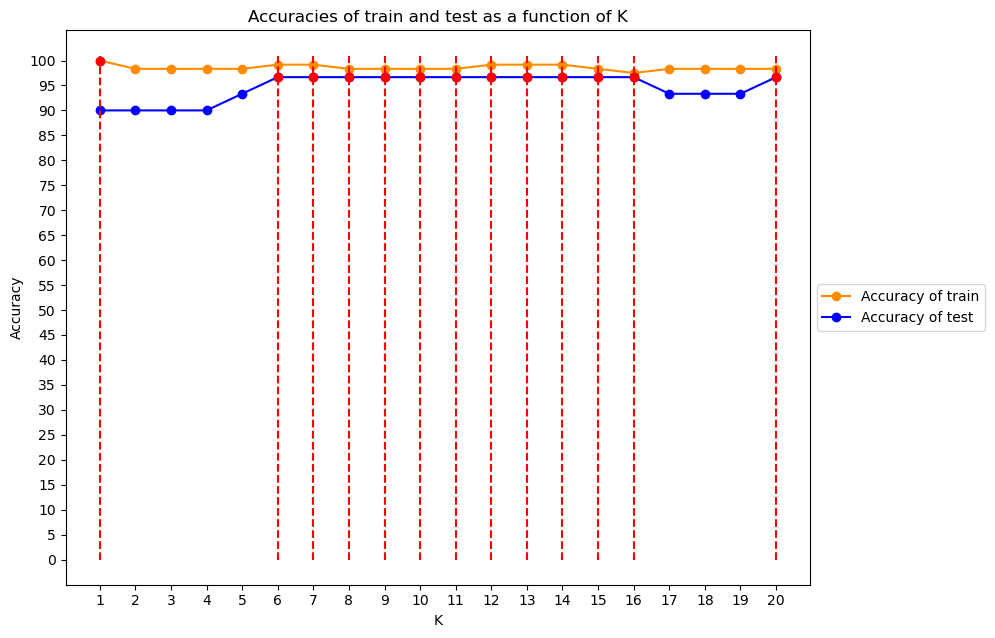

In [1767]:
graph_accuracies_of_train_and_test_over_k(train_accuracies, test_accuracies, k_values)

As we can see, amongst the train data, K=1 yield a 100% accuracy, this is because an unclassified train data entry always has an identical
classified entry in the examples we use to classify. Since the two are identical, the euclidean distance between them would be the lowest possible, 0,
and since we are using the single closest neighbor (as K=1), the identical entry would be the only entry we take into an account, and so the unclassified
entry will be classified the same as the matching example entry, and it will always be the correct classification.<br><br>
It is harder to say something about the test results, because the results are affected by what entries do we take as our train data.<br>
In this code I shuffled the entries before taking a percentage of them as the train data, therefore, with each run of this code, the entries that make out the examples will be different, and so will be the results.<br>

In [1768]:
train_avg_accuracies, test_avg_accuracies, train_best_k, test_best_k = average_accuracies_for_multiple_randomized_train_and_test(df, 0.8, k_values, 100)

In [1769]:
print_accuracy_per_k(train_avg_accuracies, k_values)
print_best_ks_on_average(train_best_k[0], train_best_k[1])

----------------------------------
for K=1, there is 100% accuracy.
for K=2, there is 97.6917% accuracy.
for K=3, there is 96.3333% accuracy.
for K=4, there is 96.7167% accuracy.
for K=5, there is 97.2167% accuracy.
for K=6, there is 97.3583% accuracy.
for K=7, there is 97.5417% accuracy.
for K=8, there is 97.5583% accuracy.
for K=9, there is 97.6167% accuracy.
for K=10, there is 97.5083% accuracy.
for K=11, there is 97.7083% accuracy.
for K=12, there is 97.525% accuracy.
for K=13, there is 97.6583% accuracy.
for K=14, there is 97.55% accuracy.
for K=15, there is 97.6083% accuracy.
for K=16, there is 97.3% accuracy.
for K=17, there is 97.4083% accuracy.
for K=18, there is 97.025% accuracy.
for K=19, there is 97.1667% accuracy.
for K=20, there is 96.525% accuracy.
----------------------------------
On average the best K values were:
K=1
being the K values with the highest accuracy roughly 100% of the times.


We can see that on average K=1 is the best K for the train data. This means that K=1 was the K value that yielded the highest accuracy the most.<br>
We can see that K=1 had the highest accuracy 100% of the times. This fits perfectly with the fact I explained prior, according to which, when using train data, K=1 will always have 100% accuracy.

In [1770]:
print_accuracy_per_k(test_avg_accuracies, k_values)
print_best_ks_on_average(test_best_k[0], test_best_k[1])

----------------------------------
for K=1, there is 96.1% accuracy.
for K=2, there is 94.8% accuracy.
for K=3, there is 96.4333% accuracy.
for K=4, there is 95.9667% accuracy.
for K=5, there is 96.5% accuracy.
for K=6, there is 96.2% accuracy.
for K=7, there is 96.5% accuracy.
for K=8, there is 96.1667% accuracy.
for K=9, there is 96.5667% accuracy.
for K=10, there is 96.5333% accuracy.
for K=11, there is 96.9% accuracy.
for K=12, there is 96.8667% accuracy.
for K=13, there is 96.9667% accuracy.
for K=14, there is 96.7333% accuracy.
for K=15, there is 96.7333% accuracy.
for K=16, there is 96.0667% accuracy.
for K=17, there is 96.7% accuracy.
for K=18, there is 95.8667% accuracy.
for K=19, there is 96.2333% accuracy.
for K=20, there is 95.7% accuracy.
----------------------------------
On average the best K values were:
K=13
being the K values with the highest accuracy roughly 64% of the times.


We can see that on average K=13 is the best K for the test data. This means that K=13 was the K value that yielded the highest accuracy the most.<br>
By coincidence we also got that the average accuracy of K=13 was the highest, but this not a given!<br>
The average accuracy, as the name suggests, represents the average accuracy K=13 had across 100 runs.<br>
The 64% that is mentioned, represent the percentage of the times in which k=13 had the highest accuracy, even if that accuracy was rather low.

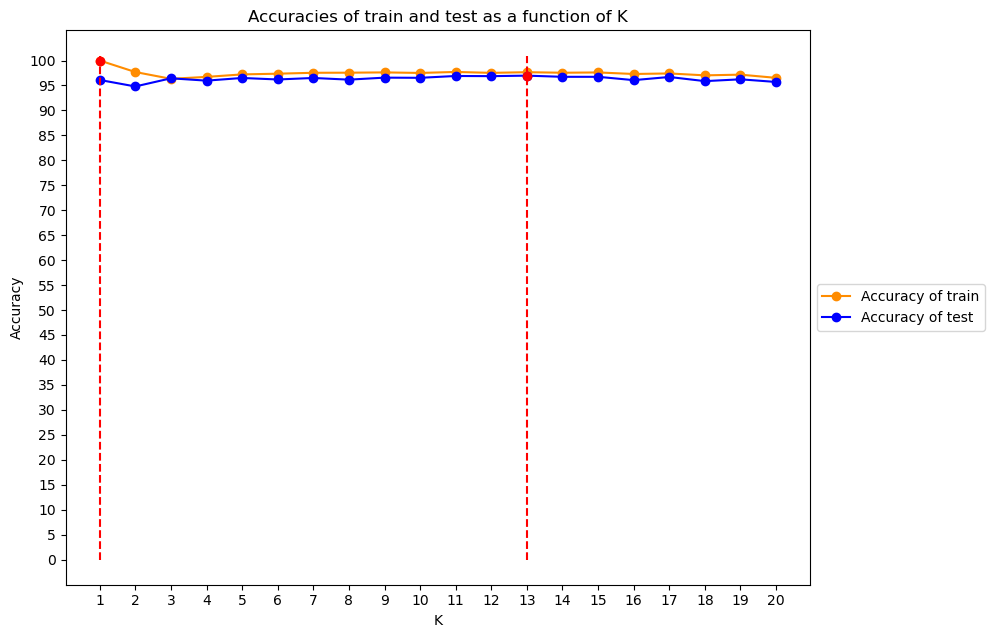

In [1771]:
graph_accuracies_of_train_and_test_over_k(train_avg_accuracies, test_avg_accuracies, k_values)

<h2>For Q4 - can be deleted</h2>

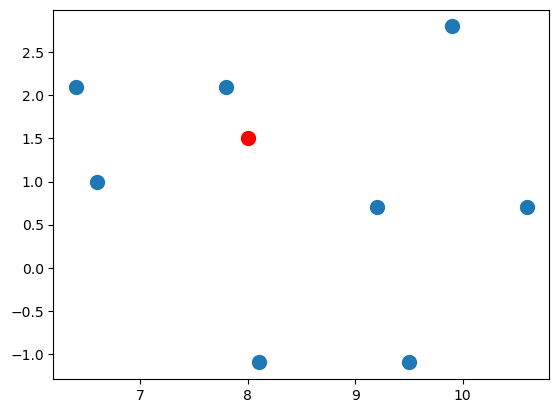

In [1775]:
data = np.array([[ 8.1 , -1.1],[ 9.9 , 2.8],[ 7.8 , 2.1],[ 9.2 , 0.7],[ 10.6 , 0.7],[ 6.4 , 2.1],[ 6.6 , 1.0],[ 9.5 , -1.1]])
x_9 = np.array([8.0 , 1.5])
plt.scatter(data[:,0], data[:,1], s=100)
plt.scatter(x_9[0], x_9[1], s=100, color="red")
plt.show()

In [1776]:
calc_euclidean_distances(x_9, data)

array([2.60192237, 2.30217289, 0.63245553, 1.44222051, 2.7202941 ,
       1.70880075, 1.48660687, 3.0016662 ])